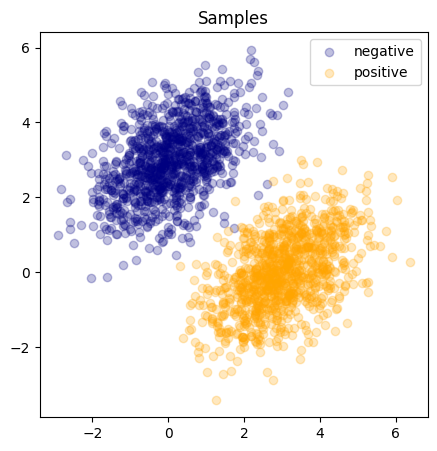

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(negative_samples[:, 0],
           negative_samples[:, 1],
           color='navy',
           alpha=0.25,
           label='negative')
ax.scatter(positive_samples[:, 0],
           positive_samples[:, 1],
           color='orange',
           alpha=0.25,
           label='positive')
ax.set_title('Samples')
ax.legend()
plt.show()

In [2]:
import tensorflow as tf

x_train = np.vstack(
    (negative_samples, positive_samples)).astype(np.float32)
y_train = np.vstack(
    (np.zeros(shape=(num_samples_per_class, 1)),
     np.ones(shape=(num_samples_per_class, 1)))).astype(np.float32)

del negative_samples
del positive_samples

input_dim = 2   # coordinates x, y
output_dim = 1  # category (=class: neg. or pos.)

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

2023-09-08 16:18:27.469605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 16:18:28.801341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 16:18:28.818772: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-

In [3]:
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

def training_step(inputs, targets, lr=0.1):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * lr)
    b.assign_sub(grad_loss_wrt_b * lr)
    return loss

In [4]:
for step in range(40):
    loss = training_step(x_train, y_train)
    print(f"step:{step}, loss:{loss:.4f}")

predictions = model(x_train)

step:0, loss:1.3585
step:1, loss:0.2266
step:2, loss:0.1196
step:3, loss:0.0996
step:4, loss:0.0918
step:5, loss:0.0861
step:6, loss:0.0810
step:7, loss:0.0764
step:8, loss:0.0722
step:9, loss:0.0683
step:10, loss:0.0648
step:11, loss:0.0616
step:12, loss:0.0586
step:13, loss:0.0559
step:14, loss:0.0534
step:15, loss:0.0511
step:16, loss:0.0490
step:17, loss:0.0471
step:18, loss:0.0454
step:19, loss:0.0438
step:20, loss:0.0423
step:21, loss:0.0410
step:22, loss:0.0398
step:23, loss:0.0386
step:24, loss:0.0376
step:25, loss:0.0367
step:26, loss:0.0358
step:27, loss:0.0350
step:28, loss:0.0343
step:29, loss:0.0336
step:30, loss:0.0330
step:31, loss:0.0325
step:32, loss:0.0319
step:33, loss:0.0315
step:34, loss:0.0310
step:35, loss:0.0307
step:36, loss:0.0303
step:37, loss:0.0300
step:38, loss:0.0297
step:39, loss:0.0294


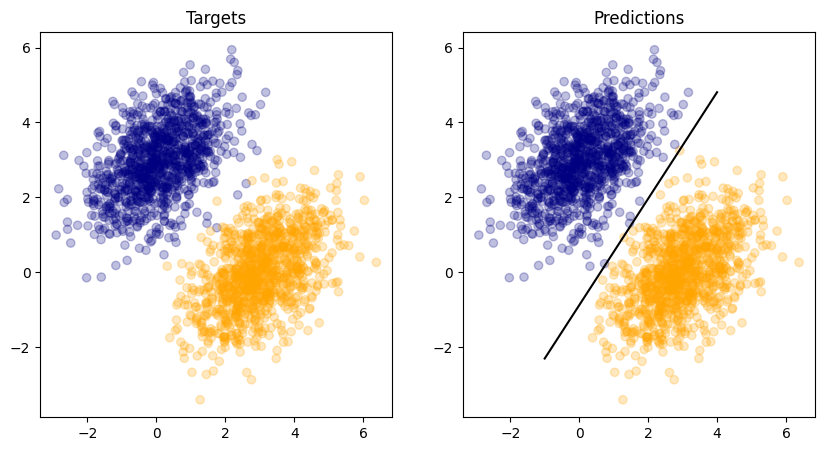

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].set_title('y')
axes[0].scatter(x_train[:, 0],
                x_train[:, 1],
                color=np.where(y_train[:, 0] == 0, 'navy', 'orange'),
                alpha=0.25)

axes[1].set_title('y^')
axes[1].scatter(x_train[:, 0],
                x_train[:, 1],
                color=np.where(predictions[:, 0] <= 0.5, 'navy', 'orange'),
                alpha=0.25)

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-k')

_ = plt.show()